In [175]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap

import seaborn as sns

import warnings

# Filter out FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None



In [176]:
df_countries_codes = pd.read_csv('../environnement_data/countries_codes_and_coordinates.csv')
df_countries_codes = df_countries_codes.rename(columns = {'Alpha-3 code':'iso_a3'})
df_countries_codes['iso_a3'] = df_countries_codes['iso_a3'].apply(lambda x: x.replace('"', ''))
df_countries_codes['iso_a3'] = df_countries_codes['iso_a3'].apply(lambda x: x.replace(' ', ''))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
data = pd.read_csv('../environnement_data/ENS - Cultural Index - Countries Databases - consolidate_table.csv')
data = data[['region', 'region_code', 'iso_a3',  'min_date', 'max_date']].copy()


data['max_date'] = round(data['max_date'], 0)
data['max_date'][data['max_date']==1900] = 1850

#data = data[data['region']=='Greek World']
data = data.sort_values(['min_date', 'max_date'], ascending=(True, True))
data = data.reset_index(drop=True)

df_country_names = world[['name', 'iso_a3']].drop_duplicates().copy()
data = pd.merge(data, df_country_names, on = 'iso_a3')


# Group by iso_a3 and aggregate min and max dates
data = data.groupby(['region', 'region_code', 'iso_a3']).agg({'min_date': 'min', 'max_date': 'max'}).reset_index()
data['max_date'][(data['region']=='Greek World')&(data['max_date']==1500)] = 700
data['max_date'][(data['region']=='Greek World')&(data['max_date']==1850)] = 700
data['max_date'][(data['region']=='Greek World')&(data['max_date']==1400)] = 700




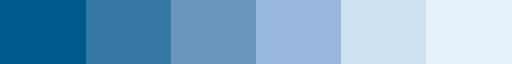

In [177]:

# Create a discrete colormap with shades of blue based on time
cmap = ListedColormap(['#005A8C', '#3477A5', '#6B95BD', '#99B8E0', '#CCE2F0', '#E6F2FA'])
cmap

In [178]:
gdf

,region,region_code,iso_a3,min_date,max_date
44,East Slavic,re_east_slavic,BLR,500.0,1850.0
45,East Slavic,re_east_slavic,RUS,500.0,1850.0
46,East Slavic,re_east_slavic,UKR,500.0,1850.0


In [179]:

# eastern Europe
# Nordic Countries
#re_east_slavic

In [180]:
def plot_region(data, region_code='re_italy', n = 10):

    data_filtered = data[data['region_code']==region_code]
    gdf = gpd.GeoDataFrame(data_filtered)


    # Iterate through region codes and plot maps
    for region_code, region_data in gdf.groupby('region'):


        # Merge with world map to get geometries
        merged_data = pd.merge(world, region_data, on='iso_a3')
        

        # Calculate the centroid of the region's geometries
        region_centroid = merged_data.geometry.unary_union.centroid

        # Plot the map centered around the region's centroid
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.set_title(region_code)

        # Set the aspect ratio to be equal for a square plot
        ax.set_aspect('equal')
        

        # Set the map extent based on the region's centroid
        ax.set_xlim([region_centroid.x - n, region_centroid.x + n])
        ax.set_ylim([region_centroid.y - n, region_centroid.y + n])

        ax.axis('off')  # Hide the axis
        
        merged_data['unique_date'] = merged_data['min_date'].astype(int).astype(str) + ' to ' +merged_data['max_date'].astype(int).astype(str)
        merged_data = merged_data.sort_values(['min_date', 'max_date'], ascending=(True, True))
        num_unique_pairs = len(set((merged_data['unique_date'])))
        
    
        # Check if there is only one color
        if num_unique_pairs == 1:
            colors = ["#005A8C"]  # Use the specific shade of blue
        else:
            # Automatically choose a gradient of blues
            colors = sns.color_palette("Blues", num_unique_pairs)

        # Create a ListedColormap
        cmap = ListedColormap(colors)

        world.boundary.plot(ax=ax, color='lightgrey')  # Plot the world map boundaries in black
        plot = merged_data.plot(ax=ax, 
                                cmap=cmap, 
                                edgecolor='black', 
                                column='unique_date',
                                cax=False,
                                legend=True)  # Plot the region data with shades of blue
        
        return plot        
        # Save or display the plot
        #plt.savefig(f'map_figures/map_{region_code}.png', bbox_inches='tight', pad_inches=0.1)
        #plt.show()  # Display the map


    # Close all plots
    #plt.close('all')

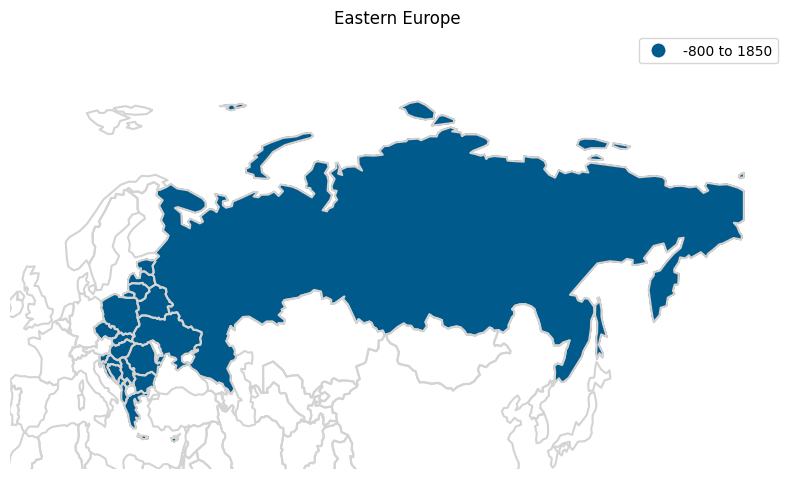

In [181]:
region_code = 're_eastern_europe'
n= 100

data_filtered = data[data['region_code']==region_code]
gdf = gpd.GeoDataFrame(data_filtered)


# Iterate through region codes and plot maps
for region_code, region_data in gdf.groupby('region'):


    # Merge with world map to get geometries
    merged_data = pd.merge(world, region_data, on='iso_a3')
    

    # Calculate the centroid of the region's geometries
    region_centroid = merged_data.geometry.unary_union.centroid

    # Plot the map centered around the region's centroid
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(region_code)

    # Set the aspect ratio to be equal for a square plot
    ax.set_aspect('equal')
    

    # Set the map extent based on the region's centroid
    ax.set_xlim([region_centroid.x - n, region_centroid.x + n])
    ax.set_ylim([region_centroid.y - n+70, region_centroid.y + n-70])

    ax.axis('off')  # Hide the axis
    
    merged_data['unique_date'] = merged_data['min_date'].astype(int).astype(str) + ' to ' +merged_data['max_date'].astype(int).astype(str)
    merged_data = merged_data.sort_values(['min_date', 'max_date'], ascending=(True, True))
    num_unique_pairs = len(set((merged_data['unique_date'])))
    

    # Check if there is only one color
    if num_unique_pairs == 1:
        colors = ["#005A8C"]  # Use the specific shade of blue
    else:
        # Automatically choose a gradient of blues
        colors = sns.color_palette("Blues", num_unique_pairs)

    # Create a ListedColormap
    cmap = ListedColormap(colors)

    world.boundary.plot(ax=ax, color='lightgrey')  # Plot the world map boundaries in black
    plot = merged_data.plot(ax=ax, 
                            cmap=cmap, 
                            edgecolor='black', 
                            column='unique_date',
                            cax=False,
                            legend=True)  # Plot the region data with shades of blue
region_code = 're_eastern_europe'
plt.savefig(f'map_figures_manual/map_{region_code}.png', bbox_inches='tight', pad_inches=0.1)

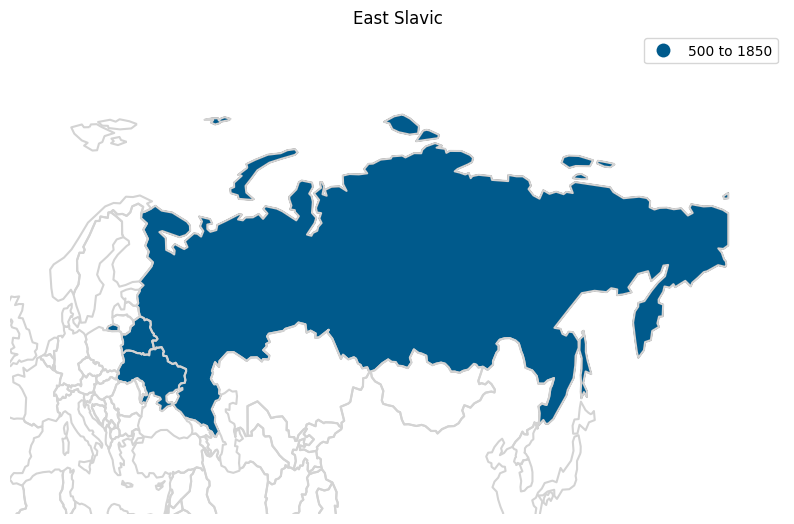

In [182]:
region_code = 're_east_slavic'
n= 100

data_filtered = data[data['region_code']==region_code]
gdf = gpd.GeoDataFrame(data_filtered)


# Iterate through region codes and plot maps
for region_code, region_data in gdf.groupby('region'):


    # Merge with world map to get geometries
    merged_data = pd.merge(world, region_data, on='iso_a3')
    

    # Calculate the centroid of the region's geometries
    region_centroid = merged_data.geometry.unary_union.centroid

    # Plot the map centered around the region's centroid
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(region_code)

    # Set the aspect ratio to be equal for a square plot
    ax.set_aspect('equal')
    

    # Set the map extent based on the region's centroid
    ax.set_xlim([region_centroid.x - n, region_centroid.x + n])
    ax.set_ylim([region_centroid.y - n+70, region_centroid.y + n-70])

    ax.axis('off')  # Hide the axis
    
    merged_data['unique_date'] = merged_data['min_date'].astype(int).astype(str) + ' to ' +merged_data['max_date'].astype(int).astype(str)
    merged_data = merged_data.sort_values(['min_date', 'max_date'], ascending=(True, True))
    num_unique_pairs = len(set((merged_data['unique_date'])))
    

    # Check if there is only one color
    if num_unique_pairs == 1:
        colors = ["#005A8C"]  # Use the specific shade of blue
    else:
        # Automatically choose a gradient of blues
        colors = sns.color_palette("Blues", num_unique_pairs)

    # Create a ListedColormap
    cmap = ListedColormap(colors)

    world.boundary.plot(ax=ax, color='lightgrey')  # Plot the world map boundaries in black
    plot = merged_data.plot(ax=ax, 
                            cmap=cmap, 
                            edgecolor='black', 
                            column='unique_date',
                            cax=False,
                            legend=True)  # Plot the region data with shades of blue
region_code = 're_east_slavic'
plt.savefig(f'map_figures_manual/map_{region_code}.png', bbox_inches='tight', pad_inches=0.1)

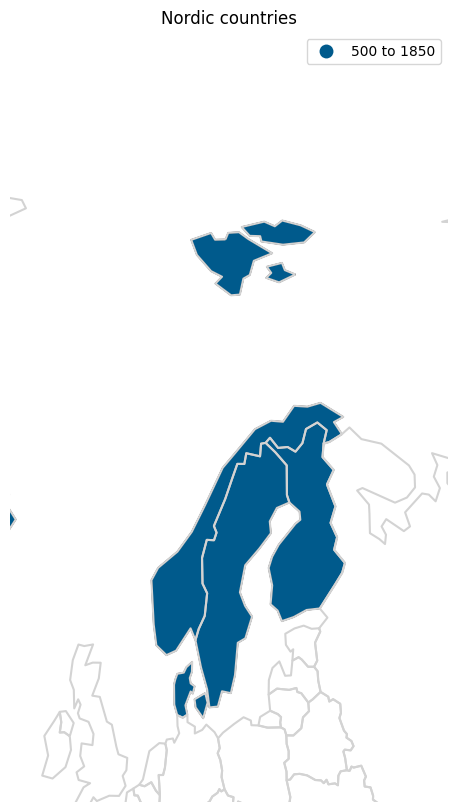

In [183]:
region_code = 're_nordic_countries'
n= 30

data_filtered = data[data['region_code']==region_code]
gdf = gpd.GeoDataFrame(data_filtered)


# Iterate through region codes and plot maps
for region_code, region_data in gdf.groupby('region'):


    # Merge with world map to get geometries
    merged_data = pd.merge(world, region_data, on='iso_a3')
    

    # Calculate the centroid of the region's geometries
    region_centroid = merged_data.geometry.unary_union.centroid

    # Plot the map centered around the region's centroid
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(region_code)

    # Set the aspect ratio to be equal for a square plot
    ax.set_aspect('equal')
    

    # Set the map extent based on the region's centroid
    ax.set_xlim([region_centroid.x - n, region_centroid.x + n])
    ax.set_ylim([region_centroid.y - n+15, region_centroid.y + n-5])

    ax.axis('off')  # Hide the axis
    
    merged_data['unique_date'] = merged_data['min_date'].astype(int).astype(str) + ' to ' +merged_data['max_date'].astype(int).astype(str)
    merged_data = merged_data.sort_values(['min_date', 'max_date'], ascending=(True, True))
    num_unique_pairs = len(set((merged_data['unique_date'])))
    

    # Check if there is only one color
    if num_unique_pairs == 1:
        colors = ["#005A8C"]  # Use the specific shade of blue
    else:
        # Automatically choose a gradient of blues
        colors = sns.color_palette("Blues", num_unique_pairs)

    # Create a ListedColormap
    cmap = ListedColormap(colors)

    world.boundary.plot(ax=ax, color='lightgrey')  # Plot the world map boundaries in black
    plot = merged_data.plot(ax=ax, 
                            cmap=cmap, 
                            edgecolor='black', 
                            column='unique_date',
                            cax=False,
                            legend=True)  # Plot the region data with shades of blue

region_code = 're_nordic_countries'
plt.savefig(f'map_figures_manual/map_{region_code}.png', bbox_inches='tight', pad_inches=0.1)

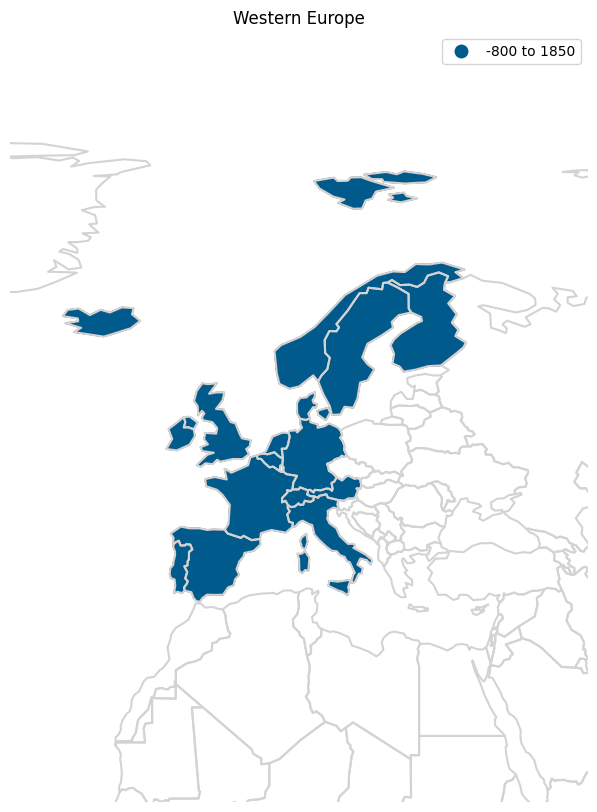

In [184]:
region_code = 're_western_europe'
plot = plot_region(data, region_code = region_code,n=40)
plt.savefig(f'map_figures_manual/map_{region_code}.png', bbox_inches='tight', pad_inches=0.1)

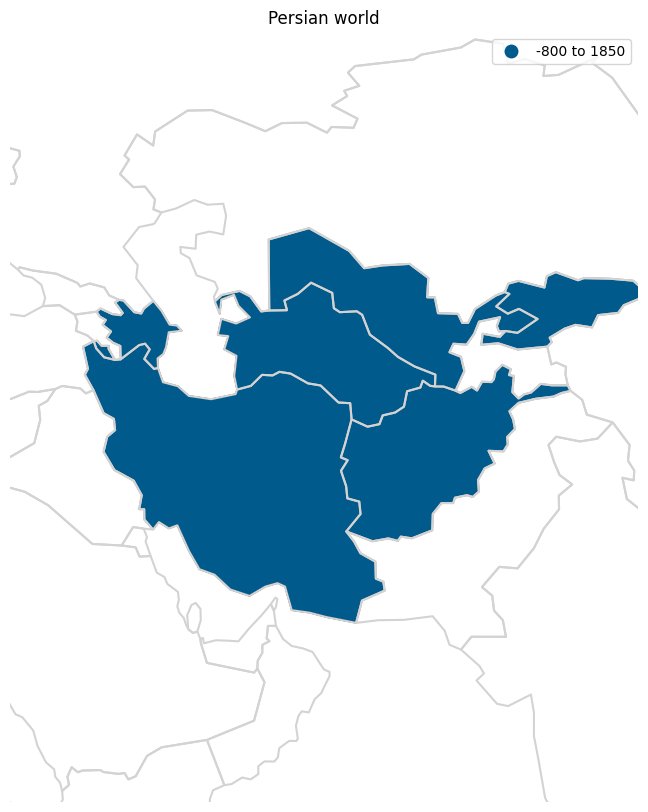

In [185]:
region_code = 're_persian_world'
plot = plot_region(data, region_code = region_code,n=20)
plt.savefig(f'map_figures_manual/map_{region_code}.png', bbox_inches='tight', pad_inches=0.1)

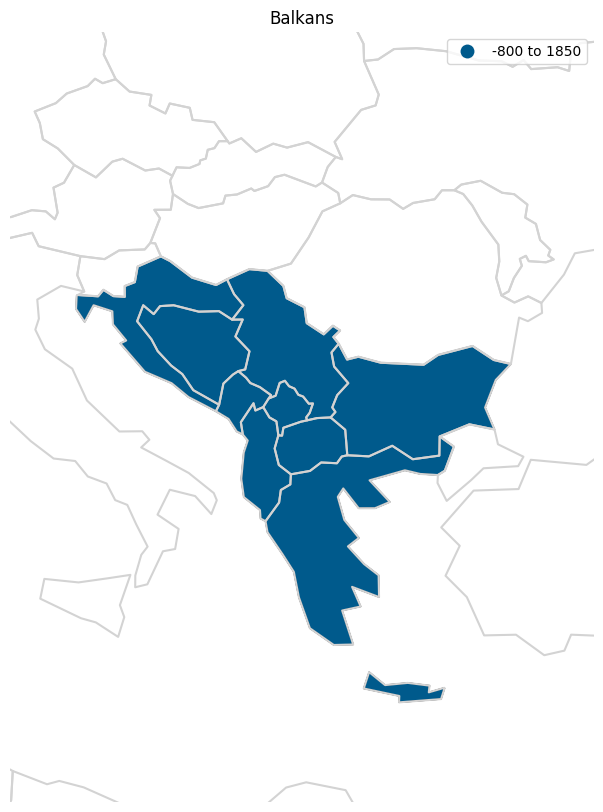

In [186]:
region_code = 're_balkans'
plot = plot_region(data, region_code = region_code,n=10)
plt.savefig(f'map_figures_manual/map_{region_code}.png', bbox_inches='tight', pad_inches=0.1)

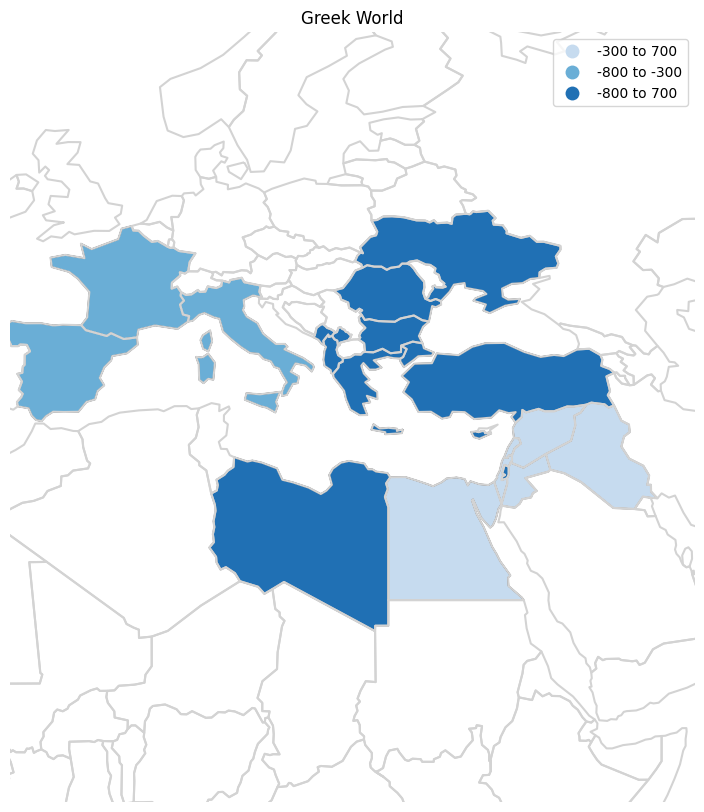

In [187]:
region_code = 're_greek_world'
plot = plot_region(data, region_code = region_code,n=30)
plt.savefig(f'map_figures_manual/map_{region_code}.png', bbox_inches='tight', pad_inches=0.1)

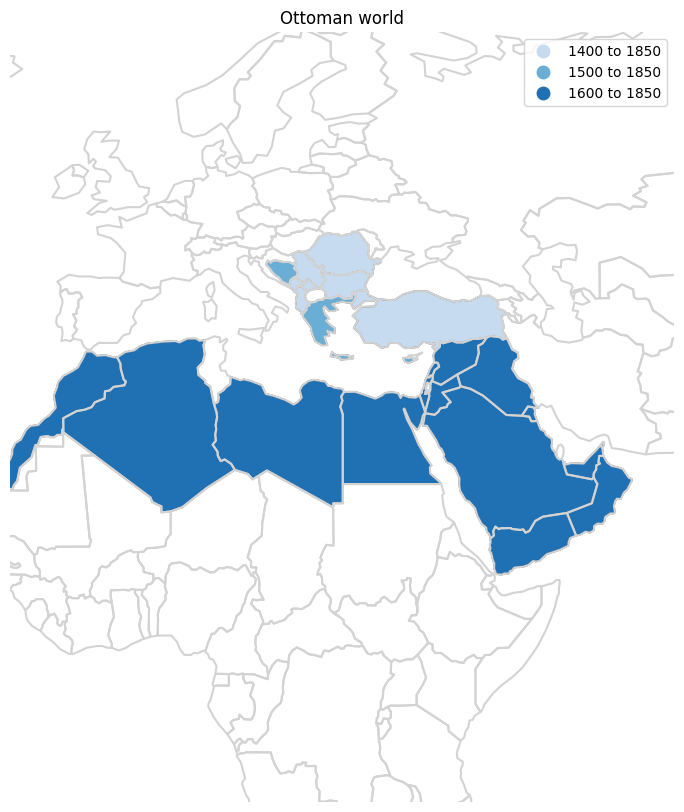

In [188]:
region_code = 're_ottoman_world'
plot = plot_region(data, region_code = region_code,n=40)
plt.savefig(f'map_figures_manual/map_{region_code}.png', bbox_inches='tight', pad_inches=0.1)

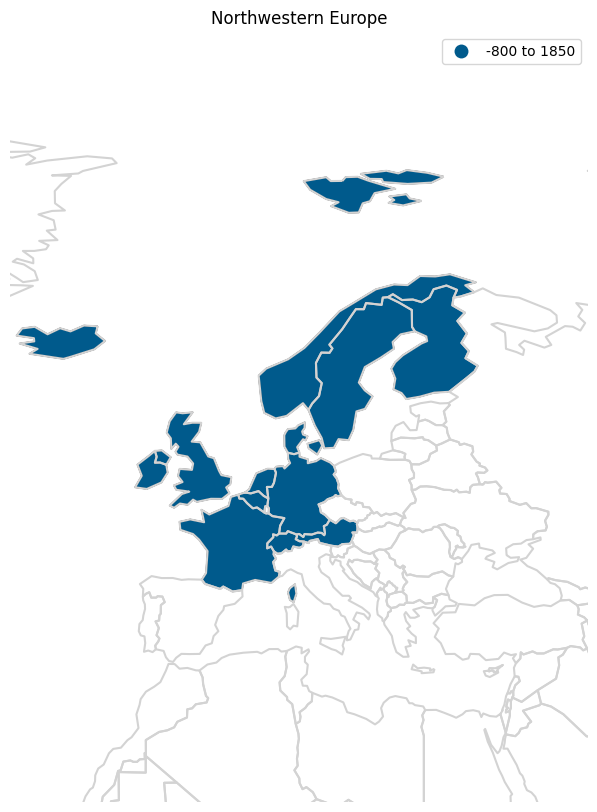

In [189]:
region_code = 're_northwestern_europe'
plot = plot_region(data, region_code = region_code,n=35)
plt.savefig(f'map_figures_manual/map_{region_code}.png', bbox_inches='tight', pad_inches=0.1)

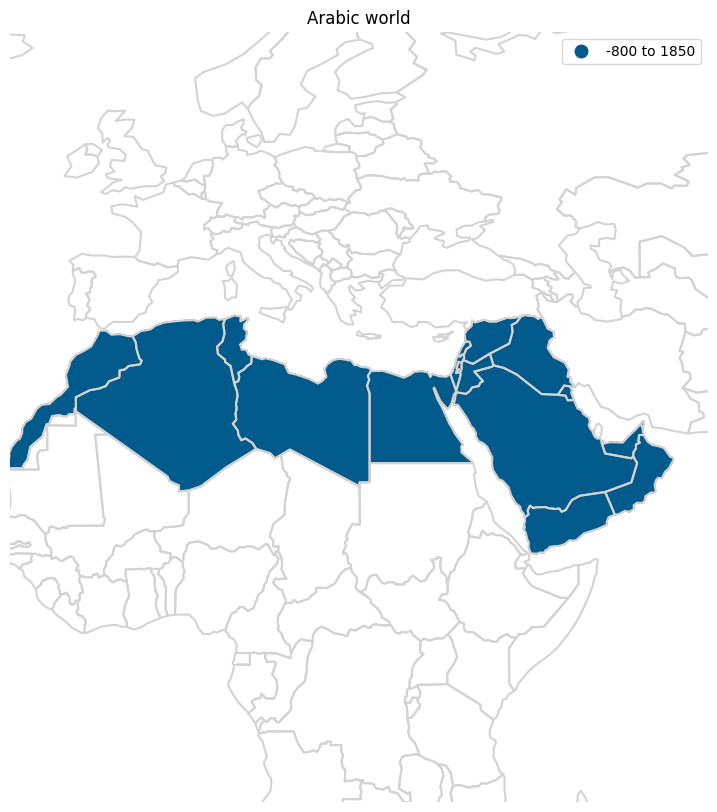

In [190]:
region_code = 're_arabic_world'
plot = plot_region(data, region_code = region_code,n=40)
plt.savefig(f'map_figures_manual/map_{region_code}.png', bbox_inches='tight', pad_inches=0.1)

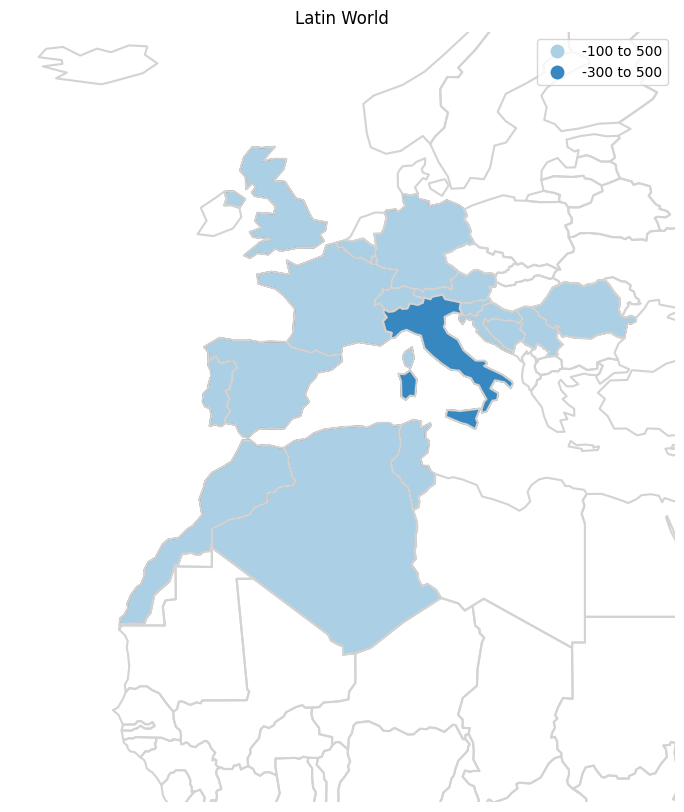

In [191]:
region_code = 're_latin'
plot = plot_region(data, region_code = region_code,n=30)
plt.savefig(f'map_figures_manual/map_{region_code}.png', bbox_inches='tight', pad_inches=0.1)

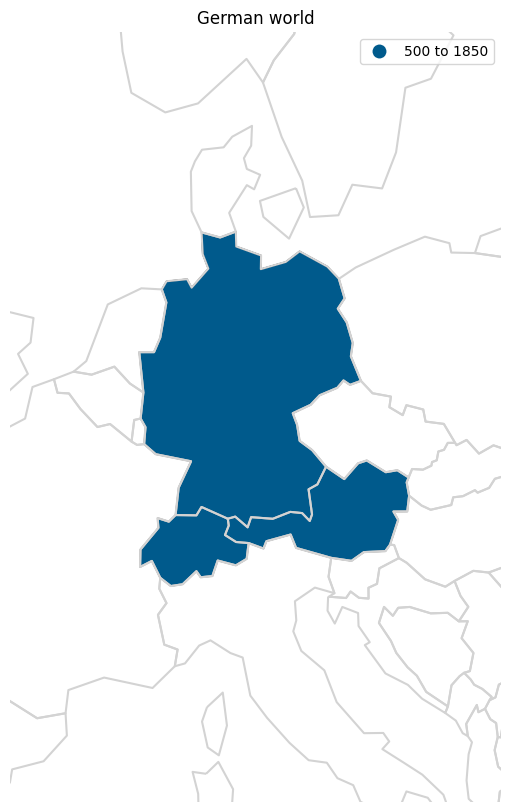

In [192]:
region_code = 're_german_world'
plot = plot_region(data, region_code = region_code,n=10)
plt.savefig(f'map_figures_manual/map_{region_code}.png', bbox_inches='tight', pad_inches=0.1)

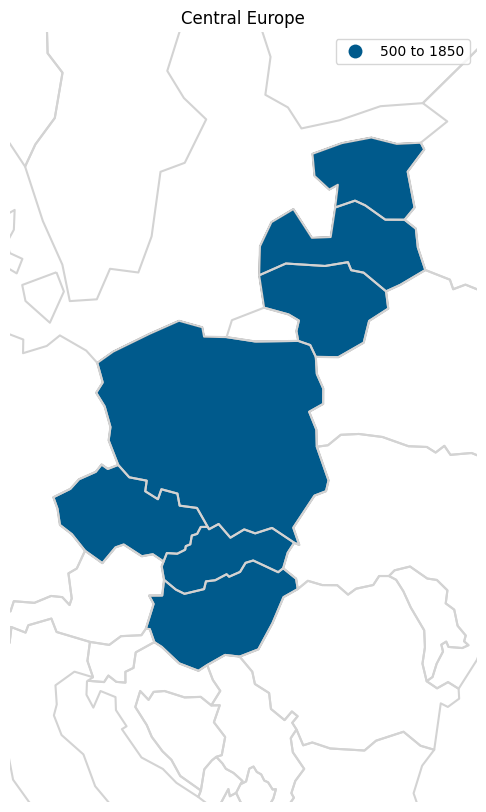

In [193]:
region_code = 're_central_europe'
plot = plot_region(data, region_code = region_code,n=10)
plt.savefig(f'map_figures_manual/map_{region_code}.png', bbox_inches='tight', pad_inches=0.1)

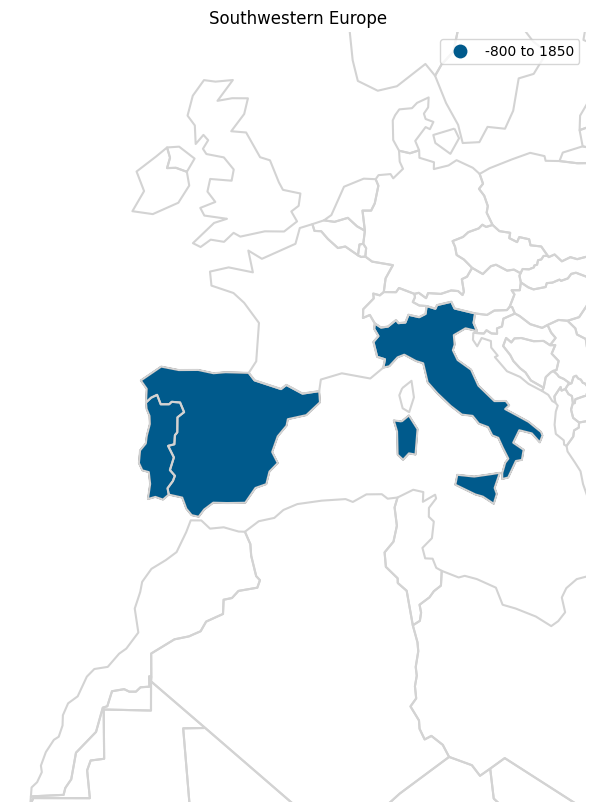

In [194]:
region_code = 're_southwestern_europe'
plot = plot_region(data, region_code = region_code,n=20)
plt.savefig(f'map_figures_manual/map_{region_code}.png', bbox_inches='tight', pad_inches=0.1)

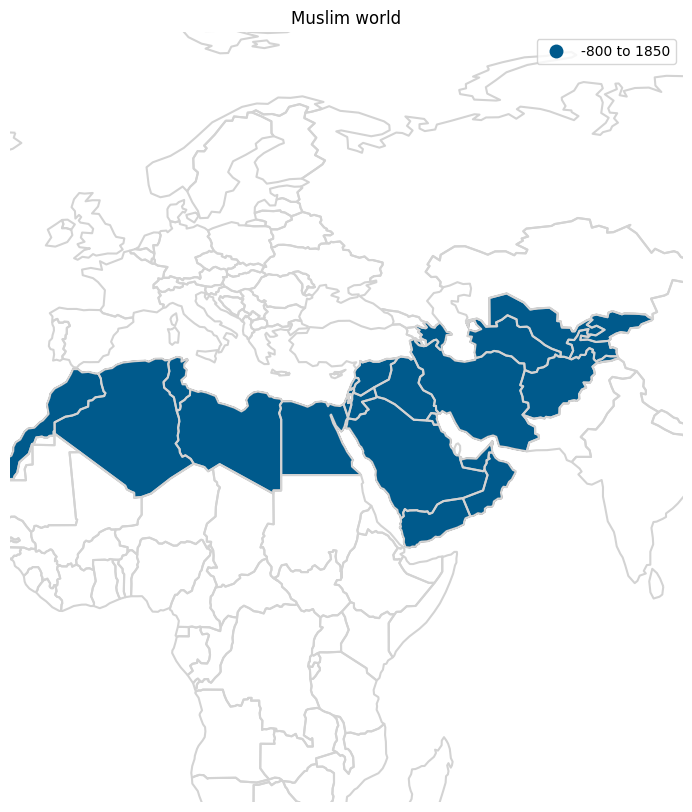

In [195]:
keep_regions = [
 're_western_europe',
 're_persian_world',
 're_balkans',
 're_greek_world',
 're_ottoman_world',
 're_northwestern_europe',
 're_latin',
 're_eastern_europe',
 're_arabic_world',
 're_german_world',
 're_central_europe',
 're_southwestern_europe',
 're_muslim_world',
 're_indian_world',
 're_nordic_countries',
 're_chinese_world',
 're_low_countries',
 're_mediterreanean',
 're_arabian_peninsula',
 're_east_slavic']

region_code = 're_muslim_world'
plot = plot_region(data, region_code = region_code,n=50)
plt.savefig(f'map_figures_manual/map_{region_code}.png', bbox_inches='tight', pad_inches=0.1)

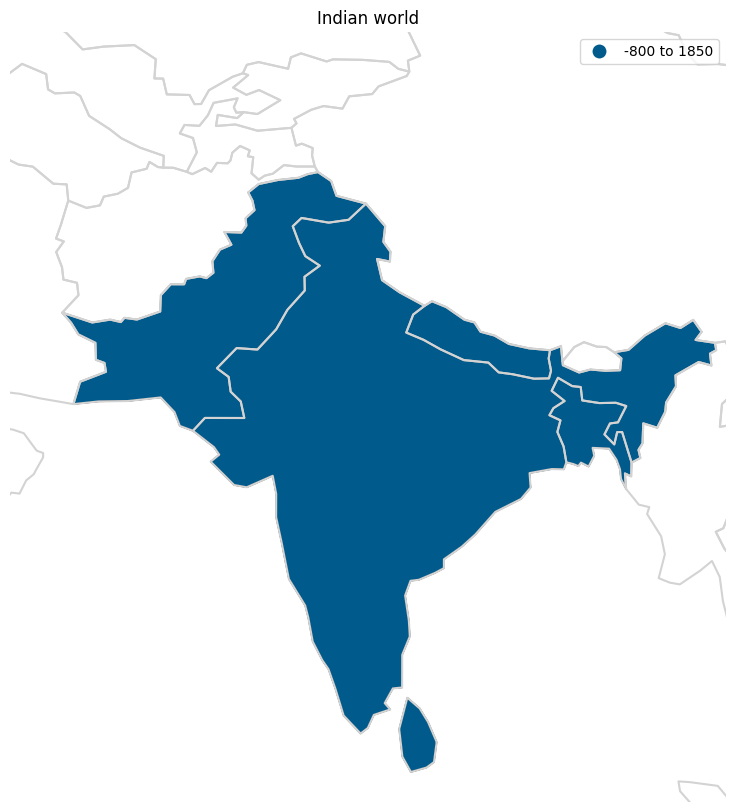

In [196]:
region_code = 're_indian_world'
plot = plot_region(data, region_code = region_code,n=20)
plt.savefig(f'map_figures_manual/map_{region_code}.png', bbox_inches='tight', pad_inches=0.1)

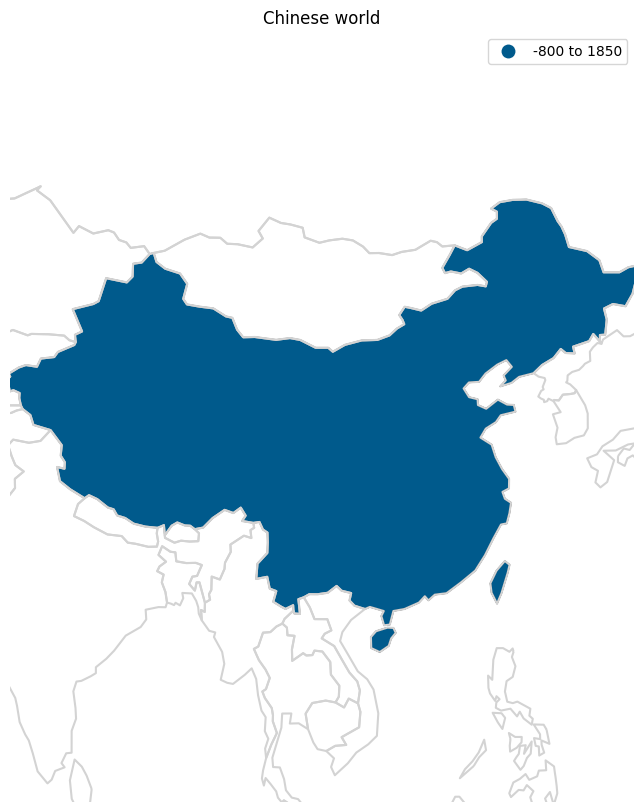

In [197]:
region_code = 're_chinese_world'
plot = plot_region(data, region_code = region_code,n=30)
plt.savefig(f'map_figures_manual/map_{region_code}.png', bbox_inches='tight', pad_inches=0.1)

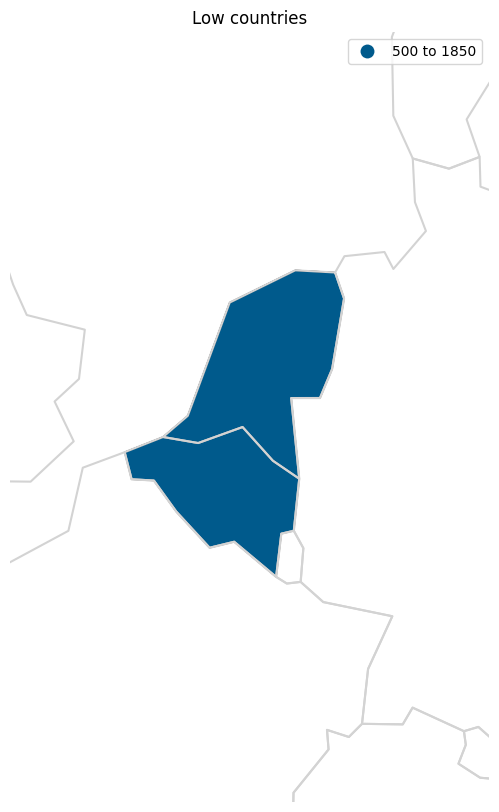

In [198]:
region_code = 're_low_countries'
plot = plot_region(data, region_code = region_code,n=5)
plt.savefig(f'map_figures_manual/map_{region_code}.png', bbox_inches='tight', pad_inches=0.1)

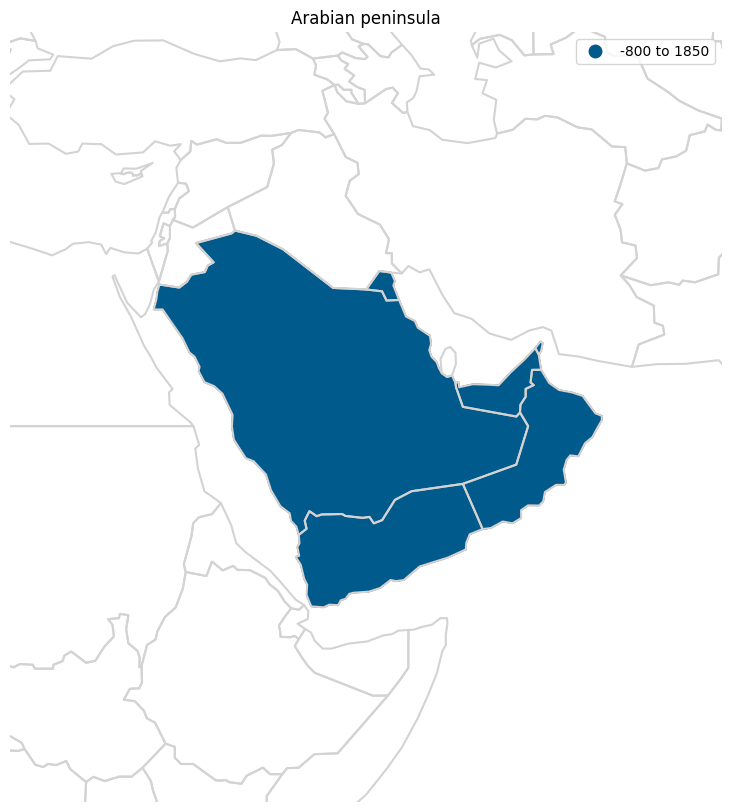

In [199]:
region_code = 're_arabian_peninsula'
plot = plot_region(data, region_code = region_code,n=20)
plt.savefig(f'map_figures_manual/map_{region_code}.png', bbox_inches='tight', pad_inches=0.1)

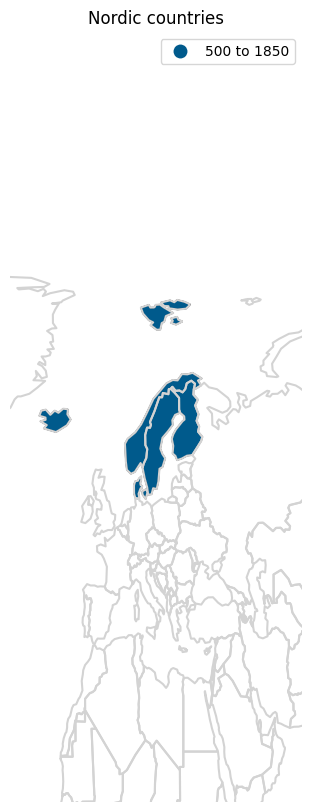

In [200]:
# Iterate through region codes and plot maps
for region_code, region_data in gdf.groupby('region'):


    # Merge with world map to get geometries
    merged_data = pd.merge(world, region_data, on='iso_a3')
    

    # Calculate the centroid of the region's geometries
    region_centroid = merged_data.geometry.unary_union.centroid

    # Plot the map centered around the region's centroid
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(region_code)

    # Set the aspect ratio to be equal for a square plot
    ax.set_aspect('equal')
    
    n=50

    # Set the map extent based on the region's centroid
    ax.set_xlim([region_centroid.x - n, region_centroid.x + n])
    ax.set_ylim([region_centroid.y - n, region_centroid.y + n])

    ax.axis('off')  # Hide the axis
    
    merged_data['unique_date'] = merged_data['min_date'].astype(int).astype(str) + ' to ' +merged_data['max_date'].astype(int).astype(str)
    merged_data = merged_data.sort_values(['min_date', 'max_date'], ascending=(True, True))
    num_unique_pairs = len(set((merged_data['unique_date'])))
    
    
    # Check if there is only one color
    if num_unique_pairs == 1:
        colors = ["#005A8C"]  # Use the specific shade of blue
    else:
        # Automatically choose a gradient of blues
        colors = sns.color_palette("Blues", num_unique_pairs)


    # Create a ListedColormap
    cmap = ListedColormap(colors)

    world.boundary.plot(ax=ax, color='lightgrey')  # Plot the world map boundaries in black
    plot = merged_data.plot(ax=ax, 
                            cmap=cmap, 
                            edgecolor='black', 
                            column='unique_date',
                            cax=False,
                            legend=True)  # Plot the region data with shades of blue
    
    
    
    gdf_filtered = gdf[gdf['region']==region_code]

    

    # Save or display the plot
    plt.savefig(f'map_figures/map_{region_code}.png', bbox_inches='tight', pad_inches=0.1)
    plt.show()  # Display the map


# Close all plots
plt.close('all')

#### Draw One Map

In [201]:
import sys

sys.path.append('../')

from functions_env import DB_PATH
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [202]:
conn = sqlite3.connect(DB_PATH)

In [203]:
df_occupations = pd.read_sql_query("SELECT * FROM individual_occupations", conn)
df_occupations = df_occupations[df_occupations['occupations_category'].str.contains('science')]

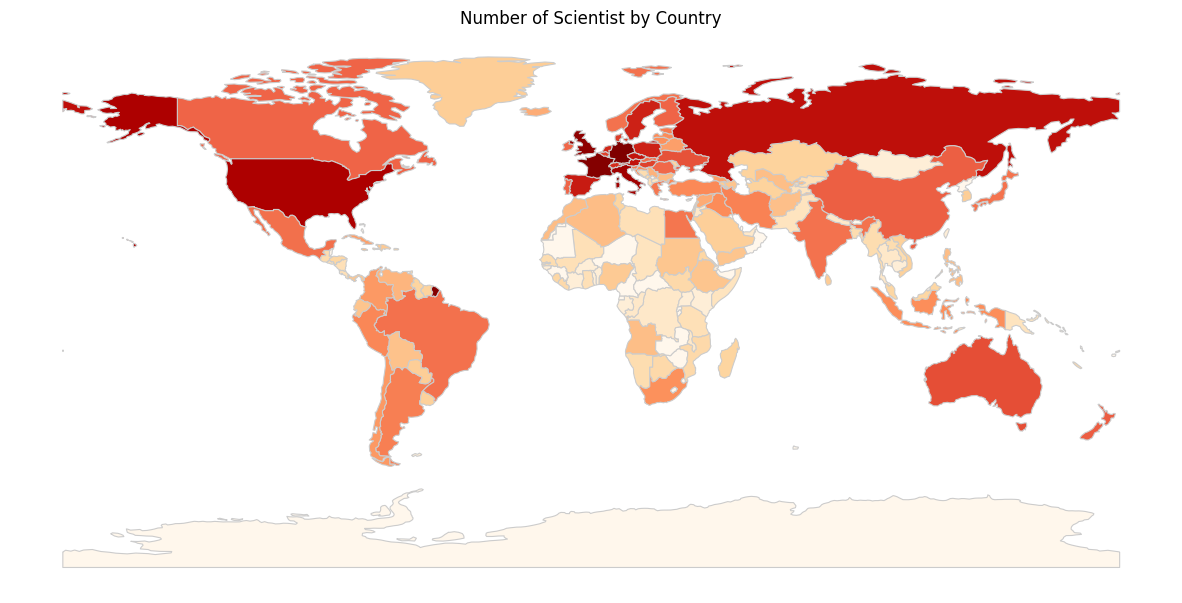

In [204]:
df_individual = pd.read_sql_query("SELECT * FROM individuals_main_information", conn)
df_individual = df_individual[['individual_wikidata_id', 'country_code', 'birthyear']]
df_individual = df_individual.dropna()
df_individual = df_individual[df_individual['birthyear']<=1850]

#kept_individuals =  pd.read_sql_query("SELECT * FROM individuals_kept", conn)
#kept_individuals = list(kept_individuals.individual_wikidata_id)

#df_final = df_individual[df_individual['individual_wikidata_id'].isin(kept_individuals)]
df_final = pd.merge(df_individual, df_occupations, on = 'individual_wikidata_id')



df_final = df_final.dropna()
df_final = df_final.rename(columns = {'country_code':'iso_a3'})

df_final = df_final.groupby('iso_a3')['individual_wikidata_id'].count().rename('count_individuals').reset_index()
df_final = df_final.sort_values('count_individuals', ascending=False)
#q = 100000

q = 100
df_final['bin'] = pd.cut(df_final['count_individuals'].rank(method= 'first'), bins=q, labels=list(np.arange(q)), precision=0)
df_final['bin'] = df_final['bin'].astype(int)
#df_final['bin'] = df_final['bin']+1

df_final['bin']= np.log(1+ df_final['count_individuals'])


# Merge the GeoDataFrame with the data
#gdf = pd.merge(df_final, world, on='iso_a3', how = 'outer')
#gdf['bin'][gdf['bin'].isna()] = 0

# Merge the GeoDataFrame with the data
gdf = world.merge(df_final, on='iso_a3', how = 'outer')
gdf = gdf.fillna(0)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf.plot(column='bin', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)


# Hide x and y axis
ax.set_axis_off()

# Add legend on top right
##egend = ax.get_legend()
#legend.set_bbox_to_anchor((1, 1))

# Add labels and title
ax.set_title('Number of Scientist by Country')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()